# Construindo Aplicações com Visão Computacional em Python
## Introdução

Este notebook tem como objetivo capacitar os alunos a desenvolver aplicações básicas de visão computacional usando Python. Vamos abordar desde a configuração do ambiente no Kaggle até a implementação de uma aplicação para identificar e diferenciar objetos específicos em uma imagem utilizando modelos pré-treinados.

## Bibliografia e Cursos Online

- **Livros:**
  - "Learning OpenCV 4 Computer Vision with Python" por Joseph Howse
  - "Deep Learning for Computer Vision" por Rajalingappaa Shanmugamani
  - "Automate the Boring Stuff with Python: Practical Programming for Total Beginners" por Al Sweigart

- **Cursos Online:**
  - [Coursera: Introduction to Computer Vision](https://www.coursera.org/learn/computer-vision-basics)
  - [Udacity: Computer Vision Nanodegree](https://www.udacity.com/course/computer-vision-nanodegree--nd891)
  - [Formação IA para devs](https://www.rocketseat.com.br/formacao/ia-para-devs)
  - [Formação em Python](https://www.rocketseat.com.br/formacao/python)

## Introdução à Visão Computacional

Visão computacional é um campo da inteligência artificial que treina computadores para interpretar e compreender o mundo visual. Usando imagens digitais de câmeras e vídeos e modelos de deep learning, as máquinas podem identificar e classificar objetos com precisão. *Classificação, Detecção, Segmentação*
- Deep Learning: é uma subárea do aprendizado de máquina que utiliza redes neurais artificiais com muitas camadas (deep neural networks) para modelar e resolver problemas complexos. Essas redes são capazes de aprender representações de dados em múltiplos níveis de abstração, o que as torna extremamente eficazes para tarefas como reconhecimento de imagem, processamento de linguagem natural e jogos.

### Conceitos e Aplicações de Visão Computacional

A visão computacional é amplamente utilizada em diversas áreas, como:
- Reconhecimento facial
- Diagnóstico médico por imagem
- Sistemas de segurança e vigilância
- Veículos autônomos
- Realidade aumentada

### Como o Computador Enxerga uma Imagem
Para um computador, uma imagem é representada como uma matriz de números. Cada número na matriz corresponde a um pixel da imagem. Em uma imagem em escala de cinza, cada pixel é representado por um valor de intensidade que varia de 0 (preto) a 255 (branco). Em uma imagem colorida, cada pixel é representado por três valores que correspondem às intensidades das cores vermelho, verde e azul (RGB).

Por exemplo, uma imagem colorida de 100x100 pixels é representada por uma matriz 3D de tamanho 100x100x3, onde as duas primeiras dimensões correspondem à altura e largura da imagem, e a terceira dimensão corresponde aos canais de cor (R, G, B).

## Configuração do Ambiente no Kaggle
Vamos começar configurando nosso ambiente no Kaggle. O Kaggle é uma plataforma popular para ciência de dados e aprendizado de máquina, que oferece um ambiente de notebook baseado em nuvem com acesso a poderosos recursos de computação e uma vasta coleção de datasets.

## Carregamento e Processamento de Imagens do Kaggle
Vamos usar o dataset "Dogs vs. Cats" do Kaggle. O dataset já está disponível no ambiente do Kaggle, então não precisamos fazer o download manualmente

In [1]:
# Instalar bibliotecas necessárias
!pip install opencv-python-headless  # Biblioteca para processamento de imagens
!pip install numpy  # Biblioteca para manipulação de arrays
!pip install matplotlib  # Biblioteca para visualização de dados
!pip install tensorflow  # Biblioteca para deep learning

# Processamento Básico de Imagens
## Manipulação de Imagens: Carregamento, Redimensionamento, Conversão de Cores

#### Nesta seção, vamos carregar e processar uma imagem de exemplo do dataset "Dogs vs. Cats". O tratamento de imagens é uma etapa fundamental em aplicações de visão computacional. Ele envolve várias técnicas de processamento de imagens que ajudam a melhorar a qualidade das imagens, extrair características importantes e preparar os dados para análise e interpretação por algoritmos de aprendizado de máquina e redes neurais.

In [2]:
# Importar bibliotecas necessárias
import os  # Biblioteca para interagir com o sistema operacional
import cv2  # Biblioteca para processamento de imagens
import numpy as np  # Biblioteca para manipulação de arrays
import matplotlib.pyplot as plt  # Biblioteca para visualização de dados

#### Primeiro, definimos o caminho para o diretório onde as imagens de treinamento estão armazenadas



In [3]:
# Caminho para o diretório de treinamento
train_dir = '../input/dogs-vs-cats/train/train'

#### Em seguida, listamos todos os arquivos no diretório de treinamento para selecionar uma imagem de exemplo

In [4]:
# Listar arquivos no diretório de treinamento
train_files = os.listdir(train_dir)

### Carregamos uma imagem de exemplo do diretório de treinamento usando OpenCV. Convertendo a imagem de BGR (formato padrão do OpenCV) para RGB (formato padrão para exibição), exibimos a imagem original usando Matplotlib.
* OpenCV é uma biblioteca de código aberto voltada para a visão computacional e aprendizado de máquina. Ela contém mais de 2500 algoritmos otimizados para uma ampla gama de tarefas de visão computacional, como detecção e reconhecimento de rostos, identificação de objetos, classificação de ações em vídeos, rastreamento de movimentos, extração de modelos 3D, entre outros.
* Matplotlib é uma biblioteca de plotagem 2D em Python que produz figuras de alta qualidade em uma variedade de formatos. pyplot é uma coleção de funções que fazem Matplotlib funcionar como o MATLAB, proporcionando uma interface fácil de usar para criar gráficos e visualizar dados.

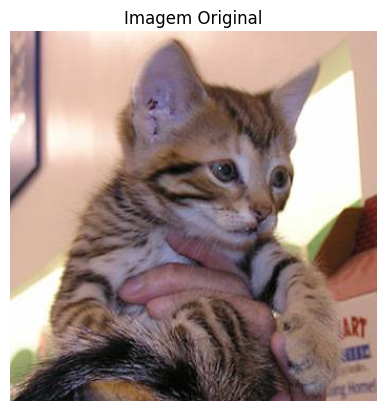

In [5]:
# Carregar uma imagem de exemplo
example_image_path = os.path.join(train_dir, train_files[0])
image = cv2.imread(example_image_path)  # Carregar a imagem usando OpenCV
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter a imagem de BGR para RGB
#Baixar:
#image_path = 'caminho/imagem.jpg'
#image = cv2.imread(image_path)



# Exibir a imagem original
plt.imshow(image_rgb)
plt.title('Imagem Original')
plt.axis('off')
plt.show()

#### Redimensionamos a imagem para 300x300 pixels para padronizar o tamanho das imagens. Em seguida, exibimos a imagem redimensionada usando Matplotlib.

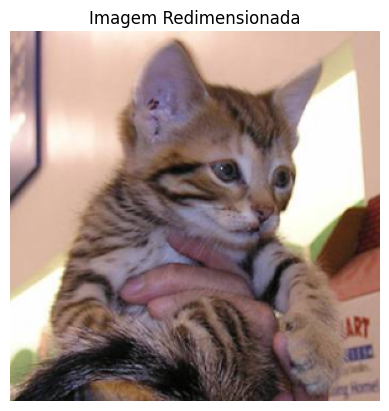

In [6]:
# Redimensionar a imagem
resized_image = cv2.resize(image_rgb, (300, 300))  # Redimensionar a imagem para 300x300 pixels

# Exibir a imagem redimensionada
plt.imshow(resized_image)
plt.title('Imagem Redimensionada')
plt.axis('off')
plt.show()

#### Convertendo a imagem de RGB para escala de cinza, reduzimos a complexidade da imagem, mantendo apenas a intensidade dos pixels. Exibimos a imagem em escala de cinza usando Matplotlib.

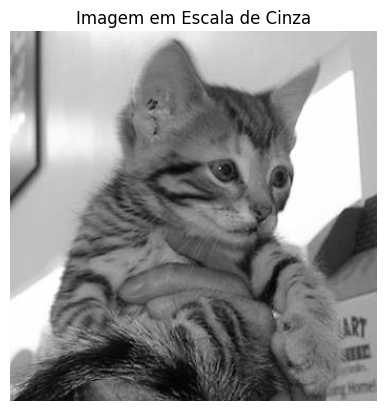

In [7]:
# Converter a imagem para escala de cinza
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)  # Converter a imagem de RGB para escala de cinza

# Exibir a imagem em escala de cinza
plt.imshow(gray_image, cmap='gray')
plt.title('Imagem em Escala de Cinza')
plt.axis('off')
plt.show()

## Operações Básicas: Ajuste de Brilho, Contraste, Filtros de Suavização e Nitidez
#### Nesta seção, aplicamos várias operações de processamento de imagem para melhorar a qualidade e destacar características importantes das imagens.


#### Ajustar o brilho e o contraste de uma imagem pode ajudar a melhorar a visibilidade dos detalhes, o que é crucial para a detecção e reconhecimento de objetos.


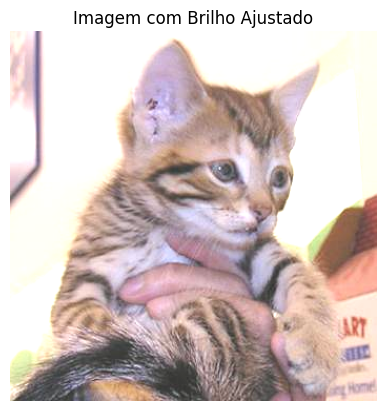

In [8]:
# Ajuste de brilho e contraste
bright_image = cv2.convertScaleAbs(image_rgb, alpha=1.2, beta=50)
# Aumenta o brilho e o contraste da imagem.
# alpha: fator de escala (1.2 aumenta o contraste)
# beta: valor adicionado a cada pixel (50 aumenta o brilho)

# Exibir a imagem com brilho ajustado
plt.imshow(bright_image)
plt.title('Imagem com Brilho Ajustado')
plt.axis('off')  # Remover os eixos
plt.show()

#### Aplicar um filtro de suavização (blur) ajuda a reduzir o ruído e os detalhes finos na imagem, o que pode ser útil para eliminar artefatos indesejados antes de aplicar algoritmos de detecção de bordas ou reconhecimento de padrões

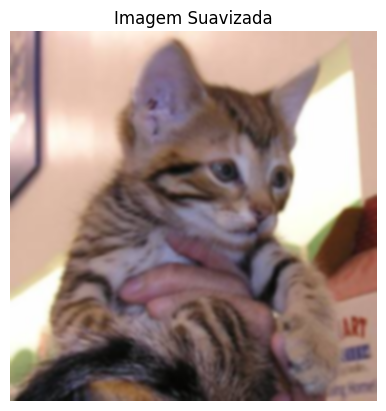

In [9]:
# Aplicar filtro de suavização
blurred_image = cv2.GaussianBlur(image_rgb, (7, 7), 0)
# Aplica um filtro de suavização (blur) à imagem.
# (7, 7): tamanho do kernel (janela de suavização)
# 0: desvio padrão da distribuição gaussiana

# Exibir a imagem suavizada
plt.imshow(blurred_image)
plt.title('Imagem Suavizada')
plt.axis('off')  # Remover os eixos
plt.show()

#### Aplicar um filtro de nitidez ajuda a realçar os detalhes e bordas na imagem, tornando as características importantes mais proeminentes. Isso é especialmente útil para tarefas de detecção de bordas e reconhecimento de objetos.


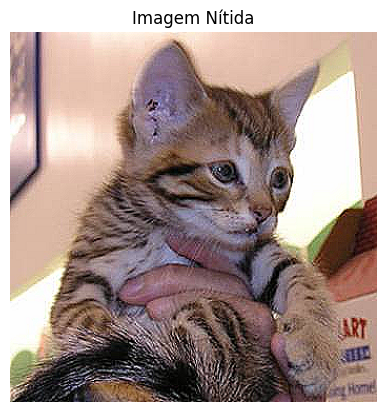

In [10]:
# Aplicar filtro de nitidez
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_image = cv2.filter2D(image_rgb, -1, kernel)
# Aplica um filtro de nitidez à imagem.
# kernel: matriz de convolução usada para realçar os detalhes da imagem

# Exibir a imagem nítida
plt.imshow(sharpened_image)
plt.title('Imagem Nítida')
plt.axis('off')  # Remover os eixos
plt.show()

# Classificação Básica de Objetos em Imagens
## Uso de um Classificador Pré-Treinado para Diferenciar Objetos Simples
## Implementação de uma Aplicação para Identificar e Diferenciar Objetos Específicos em uma Imagem

In [11]:
import cv2  # Biblioteca para processamento de imagens
import numpy as np  # Biblioteca para manipulação de arrays
import os  # Biblioteca para interagir com o sistema operacional
import matplotlib.pyplot as plt  # Biblioteca para visualização de dados
import matplotlib.image as mpimg  # Biblioteca para visualização de imagens
from tensorflow.keras.applications import MobileNetV2  # Importar o modelo MobileNetV2 pré-treinado
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions  # Funções para pré-processamento e decodificação de predições
import json  # Biblioteca para manipulação de arquivos JSON

2024-12-03 14:13:19.843726: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-03 14:13:19.843918: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-03 14:13:20.007750: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### MobileNetV2 é uma arquitetura de rede neural convolucional eficiente e leve desenvolvida pelo Google. Ela é projetada para ser usada em dispositivos móveis e embarcados, onde os recursos de computação e energia são limitados. A arquitetura MobileNetV2 é uma evolução da MobileNetV1 e introduz várias melhorias para aumentar a precisão e a eficiência

In [12]:
# Carregar o modelo pré-treinado MobileNetV2
model = MobileNetV2(weights='/kaggle/input/aaaasdads/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224.h5')

#### Um mapeamento entre os índices das classes e os rótulos das classes do dataset ImageNet. Este mapeamento é essencial para decodificar as predições feitas pelo modelo MobileNetV2, que foi treinado no dataset ImageNet

In [13]:
# Carregar o arquivo imagenet_class_index.json
with open('/kaggle/input/po8978/imagenet_class_index.json') as f:
    class_index = json.load(f)

#### Esta função carrega uma imagem, converte-a para o formato RGB, redimensiona-a e a pré-processa para ser compatível com o modelo MobileNetV2

In [14]:
# Função para carregar e preparar a imagem
def load_and_prepare_image(image_path):
    image = cv2.imread(image_path)  # Carregar a imagem usando OpenCV
    if image is None:
        raise ValueError(f"Erro ao carregar a imagem: {image_path}")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter a imagem de BGR para RGB
    resized_image = cv2.resize(image_rgb, (224, 224))  # Redimensionar a imagem para 224x224 pixels
    preprocessed_image = preprocess_input(np.expand_dims(resized_image, axis=0))  # Pré-processar a imagem
    return preprocessed_image


#### Esta função decodifica as predições do modelo MobileNetV2 usando um mapeamento local das classes do ImageNet


In [15]:
# Função para decodificar predições sem acesso à internet
def decode_predictions_local(preds, top=5):
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]  # Obter os índices das top predições
        result = [(class_index[str(i)][0], class_index[str(i)][1], pred[i]) for i in top_indices]  # Decodificar as predições
        results.append(result)
    return results

#### Esta função verifica se a predição do modelo corresponde a uma classe de cão ou gato

In [16]:
# Função para verificar se a predição é de um cão ou gato
def is_dog_or_cat(predictions):
    dog_classes = ['n02084071', 'n02085782', 'n02085936', 'n02086079', 'n02086240', 'n02086646', 'n02086910', 'n02087046', 'n02087394', 'n02088094', 'n02088238', 'n02088364', 'n02088466', 'n02088632', 'n02089078', 'n02089867', 'n02089973', 'n02090379', 'n02090622', 'n02090721', 'n02091032', 'n02091134', 'n02091244', 'n02091467', 'n02091635', 'n02091831', 'n02092002', 'n02092339', 'n02093256', 'n02093428', 'n02093647', 'n02093754', 'n02093859', 'n02093991', 'n02094114', 'n02094258', 'n02094433', 'n02095314', 'n02095570', 'n02095889', 'n02096051', 'n02096177', 'n02096294', 'n02096437', 'n02096585', 'n02097047', 'n02097130', 'n02097209', 'n02097298', 'n02097474', 'n02097658', 'n02098105', 'n02098286', 'n02098413', 'n02099267', 'n02099429', 'n02099601', 'n02099712', 'n02099849', 'n02100236', 'n02100583', 'n02100735', 'n02100877', 'n02101006', 'n02101388', 'n02101556', 'n02102040', 'n02102177', 'n02102318', 'n02102480', 'n02102973', 'n02104029', 'n02104365', 'n02105056', 'n02105162', 'n02105251', 'n02105412', 'n02105505', 'n02105641', 'n02105855', 'n02106030', 'n02106166', 'n02106382', 'n02106550', 'n02106662', 'n02107118', 'n02107312', 'n02107574', 'n02107683', 'n02107908', 'n02108000', 'n02108089', 'n02108422', 'n02108551', 'n02108915', 'n02109047', 'n02109525', 'n02109961', 'n02110063', 'n02110185', 'n02110341', 'n02110627', 'n02110806', 'n02110958', 'n02111129', 'n02111277', 'n02111500', 'n02111889', 'n02112018', 'n02112137', 'n02112350', 'n02112706', 'n02113023', 'n02113186', 'n02113624', 'n02113712', 'n02113799', 'n02113978']  # Lista de classes de cães
    cat_classes = ['n02123045', 'n02123159', 'n02123394', 'n02123597']  # Lista de classes de gatos
    for pred in predictions:
        if pred[0] in dog_classes:
            return 'Dog'
        elif pred[0] in cat_classes:
            return 'Cat'
    return 'Other'

#### Carregamos e preparamos uma imagem de exemplo para ser usada pelo modelo MobileNetV2


In [17]:
# Defina o caminho da imagem de exemplo
example_image_path = '../input/dogs-vs-cats/train/train/cat.0.jpg'  

# Carregar e preparar a imagem
prepared_image = load_and_prepare_image(example_image_path)

#### Usamos o modelo MobileNetV2 para fazer a predição na imagem preparada


In [18]:
# Fazer a predição
predictions = model.predict(prepared_image)
decoded_predictions = decode_predictions_local(predictions, top=3)[0]

1/1 [==============================] - 1s 1s/step


Verificamos se a predição do modelo corresponde a uma classe de cão ou gato. Exibimos a imagem original e a predição usando Matplotlib e exibimos as predições detalhadas no console.




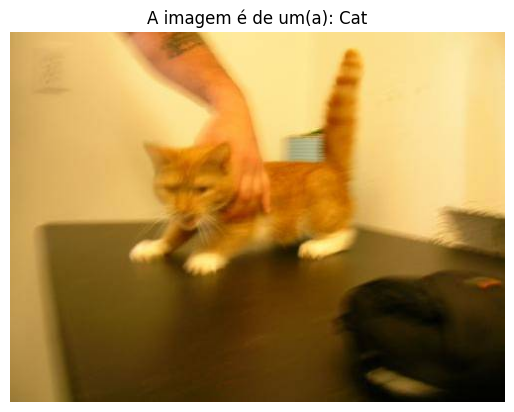

Predições detalhadas:
1: tiger_cat (0.33)
2: Norwich_terrier (0.21)
3: tabby (0.06)


In [19]:
# Verificar se a predição é de um cão ou gato
label = is_dog_or_cat(decoded_predictions)

# Exibir a imagem e a predição
img = mpimg.imread(example_image_path)
plt.imshow(img)
plt.title(f'A imagem é de um(a): {label}')
plt.axis('off')
plt.show()

# Exibir as predições detalhadas
print('Predições detalhadas:')
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")